## Decision Tree Regression 

Decision Tree Regression is based on splitting the dataset into regions based on conditions in data (entropy in data) and predicting the unseen features using the average of the decision region. More the splits that happen in the data, more is the accuracy. Decision Tree Regression may not give good results for one dimensional and two dimentional data, but for higher dimensions, it gives better predictions than most of the other algorithms.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [4]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [5]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [6]:
print(X.shape)
print(y.shape)

(10, 1)
(10,)


In [7]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [8]:
# Predicting a new result
y_pred = regressor.predict(6.5)
print(y_pred)

[150000.]


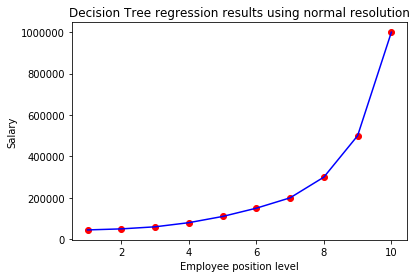

In [9]:
#visualising the decision tree regression
plt.scatter(X,y,color='red')
plt.plot(X,regressor.predict(X),color='blue')
plt.xlabel('Employee position level')
plt.ylabel('Salary')
plt.title('Decision Tree regression results using normal resolution')
plt.show()

We got accurate results right. But we are not seeing any data splits in the graph, because we are predicting the actual dataset itself. let's see the predictions for say 5.6 and 6.5. They should be the same:

In [10]:
y_pred=regressor.predict(5.6)
print(y_pred)

[150000.]


In [11]:
y_pred=regressor.predict(6.5)
print(y_pred)

[150000.]


Also let's see some other predictions with same values

In [12]:
y_pred=regressor.predict(2.6)
print(y_pred)
y_pred=regressor.predict(3.5)
print(y_pred)

[60000.]
[60000.]


Also let's see how much difference is there for 3.4, 3.5 and 3.5,3.6

In [13]:
y_pred=regressor.predict(3.4)
print(y_pred)
y_pred=regressor.predict(3.5)
print(y_pred)
print('Same values right')

[60000.]
[60000.]
Same values right


In [14]:
y_pred=regressor.predict(3.5)
print(y_pred)
y_pred=regressor.predict(3.6)
print(y_pred)
print('Not Same values!')

[60000.]
[80000.]
Not Same values!


This shows some data split is happening which can't be visualised in the plot. Let's improve the plot with more resolution to observe the actual "Decision Tree regression" results

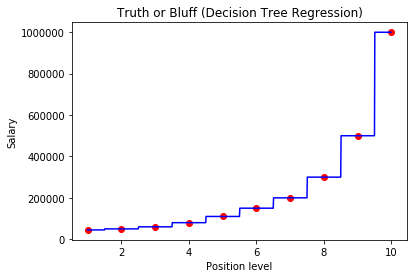

In [15]:
# Visualising the Decision Tree Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

You can see how data region splitting is happening and observe the regions are splitted in such a way that the average of each region is the training data points itself. So we have got exact predictions earlier. Decision Tree Regression is helpful when there are large number of features.